# <center>Desafio 2: 
# <center>Regresión Lineal


### Grupo 8:
- Pablo Haedo
- Marx Morales
- Alejandra Fusco


## Importación de librerías:

In [1]:
#Importamos lirerías:
import os
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import time
from pandas.io.json import json_normalize


# Importación del Dataset (Desafío 1)

Levantamos el archivo del desafío 1

In [2]:
#Levantamos la base de properati que obtuvimos luego de trabajar el desafío 1:
df = pd.read_csv('properati_desafio1_grupo8.csv')

## Cración de columnas Booleanas
Obtenemos características que creemos pueden aumenta el valor del m2, del campo descripción.
Cada una de esas características las visualizamos como nuevas columnas booleanas.

- Apto Profesional


In [3]:
tmp_df = df.description.str.extract("(apto\s*prof|uso\s*prof)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['aptoprof']
df = pd.concat([df,tmp_df],axis = 1)

- Pileta

In [4]:
tmp_df = df.description.str.extract("(pileta|picina)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['pileta']
df = pd.concat([df,tmp_df],axis = 1)

- Terraza

In [5]:
tmp_df = df.description.str.extract("(terraza)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['terraza']
df = pd.concat([df,tmp_df],axis = 1)

- Cochera / Garage

In [6]:
tmp_df = df.description.str.extract("(cochera|garage)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['garage']
df = pd.concat([df,tmp_df],axis = 1)

- Por Escalera

In [7]:
tmp_df = df.description.str.extract("(por\s*esc)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['escalera']
df = pd.concat([df,tmp_df],axis = 1)

- Dispocisión

In [8]:
tmp_df = df.description.str.extract("(contra\s*frente)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['contrafrente']
df = pd.concat([df,tmp_df],axis = 1)

In [9]:
tmp_df = df.description.str.extract("(al\s*frente)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['frente']
df = pd.concat([df,tmp_df],axis = 1)

- Baulera

In [10]:
tmp_df = df.description.str.extract("(baulera)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['baulera']
df = pd.concat([df,tmp_df],axis = 1)

- SUM

In [11]:
tmp_df = df.description.str.extract("(\s*sum\s*)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['contrafrente']
df = pd.concat([df,tmp_df],axis = 1)

- Laundry

In [12]:
tmp_df = df.description.str.extract("(laundry)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['laundry']
df = pd.concat([df,tmp_df],axis = 1)

- Parrilla

In [13]:
tmp_df = df.description.str.extract("(quincho|parrilla)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['parrilla']
df = pd.concat([df,tmp_df],axis = 1)

- Cercanía al subte / tren

In [14]:
tmp_df = df.description.str.extract("(subte)", flags= re.IGNORECASE).notnull().astype(int)
tmp_df.columns = ['subte']
df = pd.concat([df,tmp_df],axis = 1)

### Eliminamos las filas que no poseen datos que necesitamos para regresionar:

In [15]:
df.dropna(axis=0, subset=['price_usd_per_m2'], inplace=True)

In [16]:
df.dropna(axis=0, subset=['surface_total_in_m2'], inplace=True)

### Calculamos el Porcentaje cuadrático de la superficie:
Agregamos la columna porcentaje_cuadrático_sup_cubierta ya que tiene una buena performance:

In [17]:
df['surface_covered_in_m2'] = df['surface_covered_in_m2'].fillna(df['surface_total_in_m2'])

In [18]:
df['porcentaje_cuadrático_sup_cubierta']=pow(df['surface_covered_in_m2']/df['surface_total_in_m2'],2)

In [19]:
df['porcentaje_cuadrático_sup_cubierta'] = df['porcentaje_cuadrático_sup_cubierta'].fillna(0)

## Modelo CABA:

In [20]:
df_CABA = df.copy()[df['state_name']=='Capital Federal'] 

In [21]:
barrios_dumm = pd.get_dummies(df_CABA.place_name)
df_CABA = pd.concat([df_CABA, barrios_dumm], axis = 1)

In [22]:
features = ['surface_total_in_m2', 'surface_covered_in_m2', 'porcentaje_cuadrático_sup_cubierta',
            'aptoprof', 'pileta', 'terraza', 'garage', 'escalera', 'contrafrente', 
            'frente', 'baulera', 'contrafrente', 'laundry', 'parrilla', 'subte' ,  
            'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas', 
            'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito', 
            'Capital Federal', 'Catalinas', 'Centro / Microcentro', 'Chacarita', 
            'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
            'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
            'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
            'Palermo Soho', 'Palermo Viejo', 'Parque Avellaneda',
            'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
            'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta',
            'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo',
            'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo',
            'Villa Devoto', 'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
            'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo',
            'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza',
            'Villa del Parque']

In [23]:
X_CABA = df_CABA[features]
y_CABA = df_CABA.price_usd_per_m2
X_CABA.shape

(23434, 79)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_CABA, y_CABA, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE={rmse:.2f} - Features: {features}")

RMSE=3582.60 - Features: ['surface_total_in_m2', 'surface_covered_in_m2', 'porcentaje_cuadrático_sup_cubierta', 'aptoprof', 'pileta', 'terraza', 'garage', 'escalera', 'contrafrente', 'frente', 'baulera', 'contrafrente', 'laundry', 'parrilla', 'subte', 'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Capital Federal', 'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta', 'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho', 'Palermo Viejo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Vi

In [25]:
display(linreg.score(X_train,y_train))
linreg.score(X_test,y_test)

0.3178830304701664

0.2710482996429502

Text(0.5, 1.0, 'Predicción CABA')

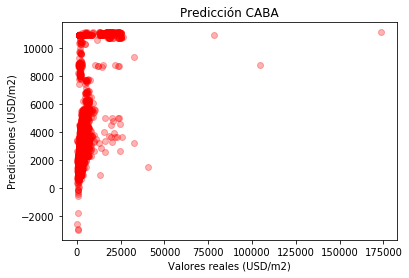

In [26]:
plt.scatter(y_test, y_pred, c='red', alpha=0.3)
plt.xlabel('Valores reales (USD/m2)')
plt.ylabel('Predicciones (USD/m2)')
plt.title('Predicción CABA')

In [27]:
df_CABA

,index,Unnamed: 0,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,0,0,0,0,0,0,0,0,0,0
2,2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,0,0,0,0,0,0,0,0,0,0
7,7,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0,0,0,0,0,0,0,0,0,0
8,8,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0,0,0,0,0,0,0,0,0,0
13,13,13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
14,14,14,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16,16,16,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,...,0,0,0,0,0,0,0,0,0,0
19,19,19,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,...,0,0,0,0,0,0,0,0,0,0
21,21,21,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,...,0,0,0,0,0,0,0,0,0,0
29,29,29,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6351179478,-58.4739639408",-34.635118,...,0,0,0,0,0,0,0,0,0,0
